In [1]:
%matplotlib inline

import os
import sys
genre_class_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
print("Loading Genre_Classification system from path", genre_class_path)
sys.path.append(genre_class_path)

import numpy as np
import pandas as pd
import tensorflow as tf
import json
import random
import pickle

Loading Genre_Classification system from path /mnt/d/UNIV NOTES/Y4S1/DSA4199/genre_classification


2022-11-17 15:18:00.895770: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-17 15:18:00.895844: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from nltk import download
from sklearn import svm
from sklearn.metrics import accuracy_score

download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/kathyij74/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
dataset_wkspc = os.path.join(genre_class_path, 'workspace', 'gb_input')
data_path = os.path.join(dataset_wkspc, 'full_corpus.csv')

full_df = pd.read_csv(data_path)

In [4]:
data_path = os.path.join(dataset_wkspc, 'data_index.json')

with open(data_path) as f:
    data_json = json.load(f)

In [5]:
index = []
for entry in data_json:
    index.append(entry['index'])

In [6]:
index[:10]

['10002',
 '10005',
 '10008',
 '10046',
 '10067',
 '10094',
 '10109',
 '10124',
 '1014',
 '10234']

In [7]:
full_df.index = index

In [8]:
full_df.head()

,abandon,abandoned,abide,ability,able,aboard,abode,about,above,abreast,...,youre,yours,yourself,yourselves,youth,youthful,youve,youyou,zip,genre
10002,0,0,1,2,28,0,1,103,35,0,...,1,0,0,0,0,0,1,0,1,5
10005,0,1,1,3,27,0,1,136,12,0,...,0,5,2,0,5,1,0,0,1,5
10008,3,2,1,0,7,60,0,128,21,2,...,20,0,18,2,2,1,15,0,1,5
10046,0,0,2,0,3,3,2,133,29,1,...,16,13,14,0,33,2,10,0,1,3
10067,0,1,1,1,22,7,0,166,26,1,...,26,4,17,0,1,0,8,0,1,2


In [9]:
full_df['genre'].value_counts()

5    1742
1     523
2     469
4     427
6     374
3     354
Name: genre, dtype: int64

In [10]:
random.seed(42)

train = random.sample(range(0, len(full_df)), int(len(full_df)*0.7))
test = [x for x in range(0, len(full_df)) if x not in train]

print(train[:20])
print(test[:20])
print(len(train))
print(len(test))

[2619, 456, 102, 3037, 1126, 1003, 914, 571, 3016, 419, 2771, 3033, 3654, 2233, 356, 2418, 1728, 130, 122, 383]
[0, 5, 7, 9, 12, 15, 17, 19, 20, 21, 27, 30, 35, 36, 37, 40, 42, 43, 44, 45]
2722
1167


In [11]:
train_df = full_df.iloc[train,]
test_df = full_df.iloc[test,]

print(train_df.shape)
print(test_df.shape)

(2722, 6660)
(1167, 6660)


In [12]:
train_df.head()

,abandon,abandoned,abide,ability,able,aboard,abode,about,above,abreast,...,youre,yours,yourself,yourselves,youth,youthful,youve,youyou,zip,genre
6407,4,6,20,0,23,0,5,119,25,0,...,0,18,57,8,153,21,0,1,1,3
20719,0,1,1,4,18,2,0,127,17,0,...,52,13,21,1,12,1,30,0,1,4
12725,1,1,3,3,4,0,1,38,22,1,...,0,1,5,1,15,4,0,0,1,3
24104,0,0,1,0,2,1,0,30,5,0,...,0,0,0,1,0,0,5,0,1,5
30004,0,0,1,0,2,0,0,17,0,0,...,1,0,0,0,0,0,0,0,1,5


In [13]:
train_df['genre'].value_counts()

5    1231
1     378
2     318
4     296
6     258
3     241
Name: genre, dtype: int64

In [14]:
test_df.head()

,abandon,abandoned,abide,ability,able,aboard,abode,about,above,abreast,...,youre,yours,yourself,yourselves,youth,youthful,youve,youyou,zip,genre
10002,0,0,1,2,28,0,1,103,35,0,...,1,0,0,0,0,0,1,0,1,5
10094,2,6,2,2,14,0,1,127,38,0,...,2,3,11,2,8,0,1,0,1,3
10124,2,0,1,0,6,3,0,43,4,0,...,19,3,9,1,1,0,9,2,1,6
10234,0,3,1,0,2,0,0,113,21,0,...,9,3,4,0,2,0,1,2,1,3
10372,2,2,1,1,14,0,1,147,18,0,...,41,19,7,1,10,1,29,1,1,6


In [15]:
test_df['genre'].value_counts()

5    511
2    151
1    145
4    131
6    116
3    113
Name: genre, dtype: int64

In [16]:
body_length = {}
for entry in data_json:
    body_length[entry['index']] = entry['body_length']

In [17]:
body_length['6407']

225019

In [18]:
#pd.DataFrame(train_df.columns).to_csv('full_notstemmed_ns_features.csv')

In [18]:
# rescale the data by dividing it with row sum then standardize it
from sklearn.preprocessing import StandardScaler

train_index = train_df.index
genre = train_df.iloc[:, -1:]
train_df = train_df.iloc[:, :-1]
train_columns = train_df.columns
for number in train_index:
    train_df.loc[number,:] = train_df.loc[number,:].div(int(body_length[number]))
#train_df = train_df.div(train_df.sum(axis=1), axis=0)
scaler = StandardScaler()
train_df = scaler.fit_transform(train_df)
train_df = pd.DataFrame(train_df)
train_df.index = train_index
train_df.columns = train_columns
train_df['genre'] = genre

In [19]:
train_df.head()

,abandon,abandoned,abide,ability,able,aboard,abode,about,above,abreast,...,youre,yours,yourself,yourselves,youth,youthful,youve,youyou,zip,genre
6407,0.421389,0.223040,0.700488,-0.456074,-0.439258,-0.380707,1.068668,-1.992709,-0.471847,-0.332112,...,-0.921239,0.212960,1.124335,1.008071,4.507908,3.277390,-0.826338,-0.113553,-0.681703,3
20719,-0.404377,-0.232587,-0.792260,0.471062,0.125388,-0.180263,-0.393393,-0.750610,-0.121871,-0.332112,...,0.766617,0.972198,0.773182,-0.031910,0.457570,0.010673,1.060831,-0.361389,-0.597104,4
12725,-0.006681,-0.276528,-0.497796,0.130230,-0.915713,-0.380707,0.169919,-2.325042,-0.032331,0.243418,...,-0.921239,-0.829950,-0.719602,-0.097108,0.505293,0.956899,-0.826338,-0.361389,-0.620698,3
24104,-0.404377,-0.512780,-0.049272,-0.456074,-0.464044,0.106301,-0.393393,-0.439260,0.299662,-0.332112,...,-0.921239,-0.954944,-1.094564,1.572560,-0.426683,-0.388123,0.702044,-0.361389,-0.016485,5
30004,-0.404377,-0.512780,1.459260,-0.456074,0.651376,-0.380707,-0.393393,0.721957,-1.104006,-0.332112,...,-0.509174,-0.954944,-1.094564,-0.447652,-0.426683,-0.388123,-0.826338,-0.361389,1.162382,5


In [20]:
from sklearn import svm
from matplotlib import pyplot as plt

X = train_df.iloc[:, :-1].to_numpy()
y = train_df.iloc[:, -1:].to_numpy().flatten()

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [21]:
clf2 = svm.LinearSVC(loss='hinge', max_iter=100000)
clf2.fit(X, y)

LinearSVC(loss='hinge', max_iter=100000)

In [22]:
clf3 = svm.SVC(kernel='linear', class_weight='balanced')
clf3.fit(X, y)

SVC(class_weight='balanced', kernel='linear')

In [23]:
clf4 = svm.LinearSVC(loss='hinge', class_weight='balanced', max_iter=100000)
clf4.fit(X, y)

LinearSVC(class_weight='balanced', loss='hinge', max_iter=100000)

In [54]:
with open('full_ns_std_svc', 'wb') as file1:
    pickle.dump(clf, file1)
with open('full_ns_std_lin', 'wb') as file2:
    pickle.dump(clf2, file2)
with open('full_ns_std_svc_b', 'wb') as file3:
    pickle.dump(clf3, file3)
with open('full_ns_std_lin_b', 'wb') as file4:
    pickle.dump(clf4, file4)

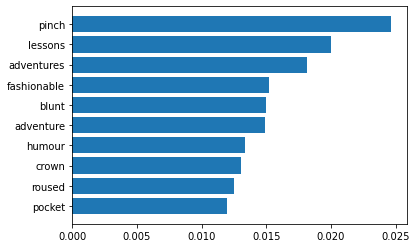

In [25]:
# check feature importance

def f_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp, names)))
    plt.barh(range(10), imp[-10:], align='center')
    plt.yticks(range(10), names[-10:])
    plt.show()
    
f_importances(clf.coef_[2], train_df.iloc[:, :-1].columns)

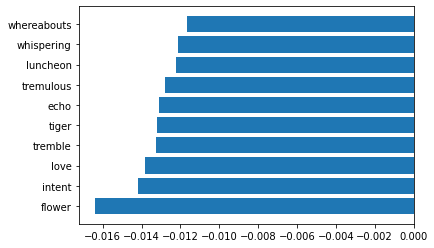

In [26]:
# check feature importance

def f_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp, names)))
    plt.barh(range(10), imp[:10], align='center')
    plt.yticks(range(10), names[:10])
    plt.show()
    
f_importances(clf.coef_[2], train_df.iloc[:, :-1].columns)

In [27]:
clf2.coef_.shape

(6, 6659)

In [28]:
# preprocess test data
test_index = test_df.index
genre = test_df.iloc[:, -1:]
test_df = test_df.iloc[:, :-1]
test_columns = test_df.columns
for number in test_index:
    test_df.loc[number,:] = test_df.loc[number,:].div(int(body_length[number]))
test_df = scaler.transform(test_df)
test_df = pd.DataFrame(test_df)
test_df.index = test_index
test_df.columns = test_columns
test_df['genre'] = genre

In [29]:
test_df.head()

,abandon,abandoned,abide,ability,able,aboard,abode,about,above,abreast,...,youre,yours,yourself,yourselves,youth,youthful,youve,youyou,zip,genre
10002,-0.404377,-0.512780,-0.696375,0.238376,1.829712,-0.380707,0.607433,-0.297983,1.925119,-0.332112,...,-0.872614,-0.954944,-1.094564,-0.447652,-0.426683,-0.388123,-0.732102,-0.361389,-0.522174,5
10094,0.518321,1.131609,-0.608161,-0.002644,-0.181105,-0.380707,0.260081,-0.796659,1.043343,-0.332112,...,-0.857741,-0.519944,-0.137616,0.365649,0.149927,-0.388123,-0.764808,-0.361389,-0.600394,3
10124,1.222222,-0.512780,-0.652814,-0.456074,-0.419393,0.137738,-0.393393,-1.626937,-0.705532,-0.332112,...,0.142178,-0.188095,0.285690,0.269221,-0.299622,-0.388123,0.149887,1.591368,-0.488132,6
10234,-0.404377,0.406052,-0.774337,-0.456074,-1.000163,-0.380707,-0.393393,-0.808310,0.222166,-0.332112,...,-0.601914,-0.468816,-0.705683,-0.447652,-0.265588,-0.388123,-0.757576,0.876520,-0.583098,3
10372,0.417615,-0.024475,-0.817023,-0.254103,-0.287482,-0.380707,0.188759,-0.732503,-0.197857,-0.332112,...,0.238395,1.499363,-0.552062,-0.085385,0.215414,-0.040622,0.763279,0.132018,-0.616456,6


In [30]:
# make prediction

X_test = test_df.iloc[:, :-1].to_numpy()
y_test = test_df.iloc[:, -1:].to_numpy().flatten()

pred = clf.predict(X_test)

In [31]:
pred

array([5, 3, 2, ..., 2, 2, 4])

In [32]:
# confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt
# import seaborn as sns

cm = metrics.confusion_matrix(y_test, pred)
cm_df = pd.DataFrame(cm, index = [1,2,3,4,5,6], columns = [1,2,3,4,5,6])
#plt.figure()
#sns.heatmap(cm_df, annot=True)
#plt.title('Confusion Matrix')
#plt.ylabel('Actual Values')
#plt.xlabel('Predicted Values')
#plt.show()

In [33]:
cm

array([[106,   7,  12,   7,   4,   9],
       [ 12, 128,   0,   9,   2,   0],
       [ 14,   1,  81,   9,   2,   6],
       [  8,   7,   9,  95,   5,   7],
       [  3,   1,   4,   3, 500,   0],
       [  2,   2,   0,   3,   0, 109]])

In [34]:
cm.diagonal()/cm.sum(axis=1)

array([0.73103448, 0.84768212, 0.71681416, 0.72519084, 0.97847358,
       0.93965517])

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred, target_names=['Adventure stories','Detective and mystery stories','Historical fiction',
                                                        'Love stories','Science fiction','Western stories'], digits=3))

                               precision    recall  f1-score   support

            Adventure stories      0.731     0.731     0.731       145
Detective and mystery stories      0.877     0.848     0.862       151
           Historical fiction      0.764     0.717     0.740       113
                 Love stories      0.754     0.725     0.739       131
              Science fiction      0.975     0.978     0.977       511
              Western stories      0.832     0.940     0.883       116

                     accuracy                          0.873      1167
                    macro avg      0.822     0.823     0.822      1167
                 weighted avg      0.872     0.873     0.872      1167



In [36]:
# make prediction

X_test = test_df.iloc[:, :-1].to_numpy()
y_test = test_df.iloc[:, -1:].to_numpy().flatten()

pred2 = clf2.predict(X_test)

In [37]:
pred2

array([5, 3, 1, ..., 2, 2, 4])

In [38]:
# confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt
# import seaborn as sns

cm2 = metrics.confusion_matrix(y_test, pred2)
cm_df2 = pd.DataFrame(cm2, index = [1,2,3,4,5,6], columns = [1,2,3,4,5,6])
#plt.figure()
#sns.heatmap(cm_df, annot=True)
#plt.title('Confusion Matrix')
#plt.ylabel('Actual Values')
#plt.xlabel('Predicted Values')
#plt.show()

In [39]:
cm2

array([[ 96,  12,  17,   9,   1,  10],
       [ 11, 128,   4,   7,   0,   1],
       [ 15,   0,  81,   9,   1,   7],
       [ 14,   6,  18,  85,   1,   7],
       [  9,   5,  20,   5, 471,   1],
       [  3,   2,   4,   1,   0, 106]])

In [40]:
cm2.diagonal()/cm2.sum(axis=1)

array([0.66206897, 0.84768212, 0.71681416, 0.64885496, 0.92172211,
       0.9137931 ])

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred2, target_names=['Adventure stories','Detective and mystery stories','Historical fiction',
                                                        'Love stories','Science fiction','Western stories'], digits=3))

                               precision    recall  f1-score   support

            Adventure stories      0.649     0.662     0.655       145
Detective and mystery stories      0.837     0.848     0.842       151
           Historical fiction      0.562     0.717     0.630       113
                 Love stories      0.733     0.649     0.688       131
              Science fiction      0.994     0.922     0.956       511
              Western stories      0.803     0.914     0.855       116

                     accuracy                          0.829      1167
                    macro avg      0.763     0.785     0.771      1167
                 weighted avg      0.840     0.829     0.832      1167



In [42]:
# make prediction

X_test = test_df.iloc[:, :-1].to_numpy()
y_test = test_df.iloc[:, -1:].to_numpy().flatten()

pred3 = clf3.predict(X_test)

In [43]:
pred3

array([5, 3, 2, ..., 2, 2, 4])

In [44]:
# confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt
# import seaborn as sns

cm3 = metrics.confusion_matrix(y_test, pred3)
cm_df3 = pd.DataFrame(cm3, index = [1,2,3,4,5,6], columns = [1,2,3,4,5,6])
#plt.figure()
#sns.heatmap(cm_df, annot=True)
#plt.title('Confusion Matrix')
#plt.ylabel('Actual Values')
#plt.xlabel('Predicted Values')
#plt.show()

In [45]:
cm3

array([[106,   7,  12,   7,   4,   9],
       [ 12, 128,   0,   9,   2,   0],
       [ 14,   1,  81,   9,   2,   6],
       [  8,   7,   9,  95,   5,   7],
       [  3,   1,   4,   3, 500,   0],
       [  2,   2,   0,   3,   0, 109]])

In [46]:
cm3.diagonal()/cm3.sum(axis=1)

array([0.73103448, 0.84768212, 0.71681416, 0.72519084, 0.97847358,
       0.93965517])

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred3, target_names=['Adventure stories','Detective and mystery stories','Historical fiction',
                                                        'Love stories','Science fiction','Western stories'], digits=3))

                               precision    recall  f1-score   support

            Adventure stories      0.731     0.731     0.731       145
Detective and mystery stories      0.877     0.848     0.862       151
           Historical fiction      0.764     0.717     0.740       113
                 Love stories      0.754     0.725     0.739       131
              Science fiction      0.975     0.978     0.977       511
              Western stories      0.832     0.940     0.883       116

                     accuracy                          0.873      1167
                    macro avg      0.822     0.823     0.822      1167
                 weighted avg      0.872     0.873     0.872      1167



In [48]:
# make prediction

X_test = test_df.iloc[:, :-1].to_numpy()
y_test = test_df.iloc[:, -1:].to_numpy().flatten()

pred4 = clf4.predict(X_test)

In [49]:
pred4

array([5, 3, 1, ..., 2, 2, 4])

In [50]:
# confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt
# import seaborn as sns

cm4 = metrics.confusion_matrix(y_test, pred4)
cm_df4 = pd.DataFrame(cm4, index = [1,2,3,4,5,6], columns = [1,2,3,4,5,6])
#plt.figure()
#sns.heatmap(cm_df, annot=True)
#plt.title('Confusion Matrix')
#plt.ylabel('Actual Values')
#plt.xlabel('Predicted Values')
#plt.show()

In [51]:
cm4

array([[ 96,  12,  17,   9,   1,  10],
       [ 11, 128,   4,   7,   0,   1],
       [ 15,   0,  81,   9,   1,   7],
       [ 14,   6,  18,  85,   1,   7],
       [  9,   5,  20,   5, 471,   1],
       [  3,   2,   4,   1,   0, 106]])

In [52]:
cm4.diagonal()/cm4.sum(axis=1)

array([0.66206897, 0.84768212, 0.71681416, 0.64885496, 0.92172211,
       0.9137931 ])

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred4, target_names=['Adventure stories','Detective and mystery stories','Historical fiction',
                                                        'Love stories','Science fiction','Western stories'], digits=3))

                               precision    recall  f1-score   support

            Adventure stories      0.649     0.662     0.655       145
Detective and mystery stories      0.837     0.848     0.842       151
           Historical fiction      0.562     0.717     0.630       113
                 Love stories      0.733     0.649     0.688       131
              Science fiction      0.994     0.922     0.956       511
              Western stories      0.803     0.914     0.855       116

                     accuracy                          0.829      1167
                    macro avg      0.763     0.785     0.771      1167
                 weighted avg      0.840     0.829     0.832      1167

